# Gender Recognition By Voice

# 1. Data Preparation

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [2]:
dataset=pd.read_csv('voice.csv')

In [3]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


## Select Target and Feature
Target (y) adalah variabel label yaitu kategori wanita dan pria sebagai target yang akan kita prediksi.Feature (x) adalah variabel lain selain variabel label yang menjadi predictor untuk variabel label.

In [4]:
y=dataset.label
x=dataset.drop(['label'],axis=1)

# 2. Preprocessing

## Describing Data

In [21]:
x.shape

(3168, 20)

In [8]:
y.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [ ]:
x[1:]

In [20]:
x.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Data Visualization

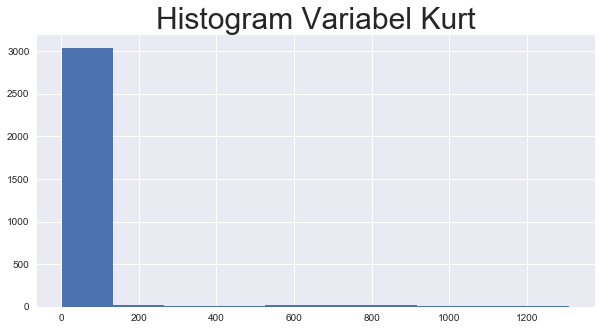

In [10]:
plt.figure(figsize=(10,5))
plt.hist(x['kurt'])
plt.title('Histogram Variabel Kurt',size=30)

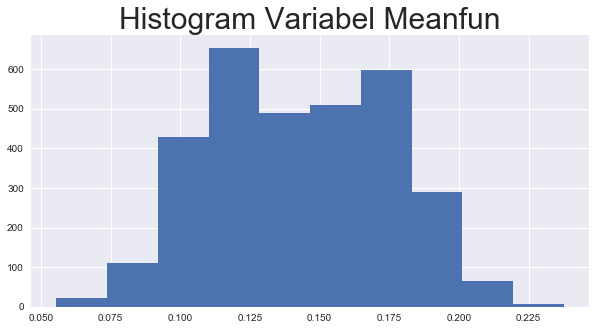

In [11]:
plt.figure(figsize=(10,5))
plt.hist(x['meanfun'])
plt.title('Histogram Variabel Meanfun',size=30)

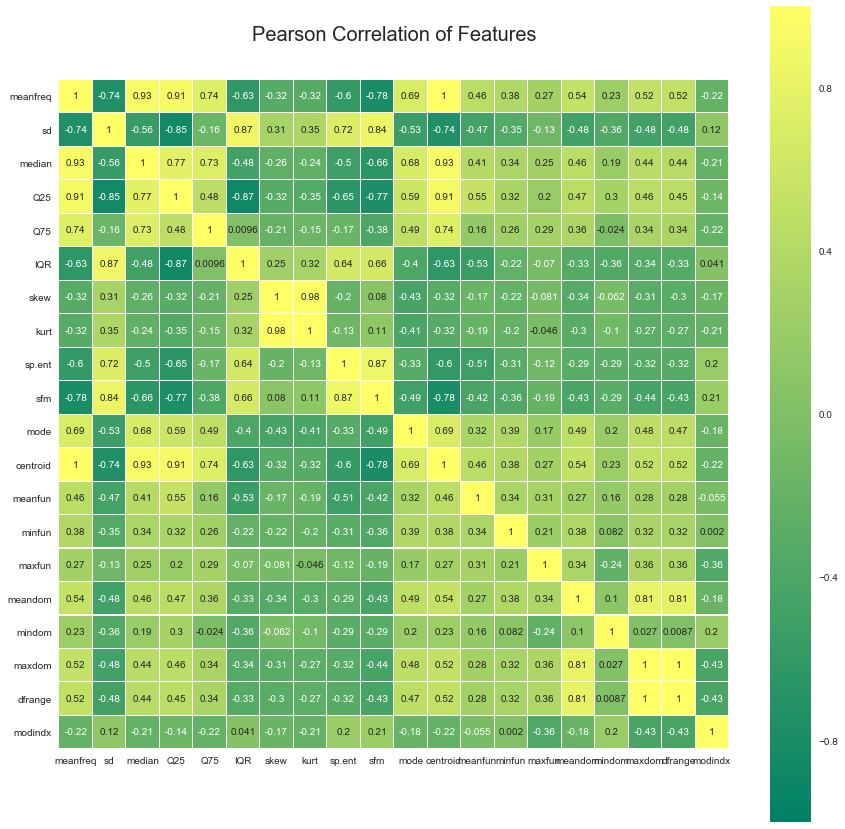

In [12]:
colormap = plt.cm.summer
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Data Normalization

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

x_transformed=pd.DataFrame(X,columns=x.columns)

In [14]:
x_transformed.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03
mean,-3.661143e-16,-1.158164e-15,-5.782412e-17,-1.737527e-16,-1.035788e-15,1.913453e-16,-1.449283e-16,3.080098e-16,6.526065e-16,-5.533593e-16,1.889342e-15,-3.661143e-16,5.140389e-16,-1.013499e-16,1.570188e-15,3.587198e-16,-1.994056e-16,4.414258e-16,1.896631e-16,-1.325399e-16
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00
min,-4.731813e+00,-2.328145e+00,-4.803987e+00,-2.881056e+00,-7.692595e+00,-1.630614e+00,-7.072008e-01,-2.557311e-01,-3.479385e+00,-2.092137e+00,-2.141210e+00,-4.731813e+00,-2.701027e+00,-1.406398e+00,-5.179122e+00,-1.564205e+00,-7.546946e-01,-1.431422e+00,-1.419137e+00,-1.454772e+00
25%,-5.764854e-01,-9.112773e-01,-4.408861e-01,-6.034077e-01,-6.777227e-01,-9.759992e-01,-3.515680e-01,-2.290380e-01,-7.408115e-01,-8.460943e-01,-6.123269e-01,-5.764854e-01,-7.990335e-01,-9.667821e-01,-1.620744e-01,-7.795958e-01,-7.084043e-01,-8.455841e-01,-8.381082e-01,-6.194614e-01
50%,1.314406e-01,1.218739e-01,1.213526e-01,-3.475757e-03,3.889284e-02,2.330866e-01,-2.224288e-01,-2.094029e-01,1.476408e-01,-6.693925e-02,2.761577e-01,1.314406e-01,-7.084407e-02,4.843493e-01,4.104803e-01,-1.207645e-01,-4.615229e-01,-1.564768e-02,-1.401262e-02,-2.879753e-01
75%,6.097473e-01,5.942754e-01,6.876044e-01,7.290261e-01,7.994535e-01,6.981837e-01,-4.916990e-02,-1.698911e-01,7.468220e-01,7.068430e-01,7.231732e-01,6.097473e-01,8.289300e-01,5.777400e-01,6.189829e-01,6.626172e-01,2.791215e-01,5.568753e-01,5.675713e-01,2.966600e-01
max,2.347370e+00,3.492409e+00,2.079633e+00,2.196155e+00,2.060643e+00,3.925441e+00,7.449607e+00,9.436434e+00,1.931618e+00,2.449219e+00,1.486164e+00,2.347370e+00,2.935963e+00,8.704820e+00,6.740922e-01,4.053288e+00,6.420297e+00,4.777568e+00,4.787384e+00,6.351733e+00


# 3. Modeling and Get Best Model

## Defining Function for Get Best Model

In [15]:
def modeling(x,y):
    #############################################
    #Defining Libraries
    #Neighbor
    from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
    
    #Linear Model
    from sklearn.linear_model import LogisticRegression,SGDClassifier,RandomizedLogisticRegression,LogisticRegressionCV
    from sklearn.linear_model import RidgeClassifier
    
    #Ensemble
    from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
    from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
    
    #SVM
    from sklearn.svm import LinearSVC,NuSVC,SVC
    
    #Tree
    from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

    #Neural Network
    from sklearn.neural_network import MLPClassifier
    #Cross Val Score
    from sklearn.cross_validation import cross_val_score
    #################################################
    #Neighbor
    knn = KNeighborsClassifier()
    RNC= RadiusNeighborsClassifier()
    
    #linear Model
    logreg = LogisticRegression(random_state = 123)
    SGD=SGDClassifier(random_state=123)
    RidgeC=RidgeClassifier(random_state=123)
    RLogreg=RandomizedLogisticRegression(random_state=123)
    logregCV=LogisticRegressionCV(random_state=123)
    
    #Ensemble
    adaboost = AdaBoostClassifier(random_state= 123, n_estimators= 100)
    bagging = BaggingClassifier(random_state= 123, n_estimators= 100)
    ETC=ExtraTreesClassifier(random_state=123)
    boosting = GradientBoostingClassifier( random_state = 123, n_estimators = 100)
    randomforest = RandomForestClassifier(random_state = 123, n_estimators= 100)
    
    
    #svm
    linearSVM = LinearSVC( random_state = 123)
    kernelSVM = SVC( random_state = 123)
    
    #tree
    extratree = ExtraTreeClassifier(random_state = 123)
    decisiontree = DecisionTreeClassifier(random_state = 123)
    
    #Neural Network
    NN=MLPClassifier(random_state=123)
    
    classifiers = [knn, logreg,SGD,RidgeC,logregCV,adaboost,
                   bagging, ETC, boosting, randomforest, linearSVM, kernelSVM, extratree, decisiontree,NN]
    for clf, label in zip(classifiers, 
                      ['KNN',
                       #'RNN',
                       'Logistic Regression', 
                       'Stochastic Gradient Descent Classifier',
                       'Ridge Classifier',
                       #'Randomized Logistic Regressor',
                       'Logistic Regression CV',
                       #'Linear Discriminant Analysis',
                       #'Quadratic Discriminant Analysis',
                       'Adaptive Boosting',
                       'Bagging',
                       'Extremely Randomized Trees',
                       'Stochastic Gradient Boositng',
                       'Random Forest',
                       'Linear SVM', 
                       'Kernel SVM',
                       'Extra Trees',
                       'Decision Trees',
                      'Neural Network']):

        scores = cross_val_score(clf, x, y, cv=7, scoring='accuracy')
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

## MODELING WITH ORIGINAL DATA

In [16]:
modeling(x,y)

C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.6826 (+/- 0.0739) [KNN]
Accuracy: 0.8897 (+/- 0.0872) [Logistic Regression]
Accuracy: 0.5006 (+/- 0.0015) [Stochastic Gradient Descent Classifier]
Accuracy: 0.9360 (+/- 0.0531) [Ridge Classifier]
Accuracy: 0.9663 (+/- 0.0209) [Logistic Regression CV]
Accuracy: 0.9621 (+/- 0.0272) [Adaptive Boosting]
Accuracy: 0.9653 (+/- 0.0190) [Bagging]
Accuracy: 0.9584 (+/- 0.0293) [Extremely Randomized Trees]
Accuracy: 0.9685 (+/- 0.0212) [Stochastic Gradient Boositng]
Accuracy: 0.9675 (+/- 0.0219) [Random Forest]
Accuracy: 0.9310 (+/- 0.0602) [Linear SVM]
Accuracy: 0.7034 (+/- 0.0860) [Kernel SVM]
Accuracy: 0.9423 (+/- 0.0256) [Extra Trees]
Accuracy: 0.9527 (+/- 0.0204) [Decision Trees]
Accuracy: 0.7640 (+/- 0.0793) [Neural Network]


## MODELING WITH NORMALIZATION DATA

In [17]:
modeling(x_transformed,y)

Accuracy: 0.9505 (+/- 0.0350) [KNN]
Accuracy: 0.9669 (+/- 0.0199) [Logistic Regression]
Accuracy: 0.9599 (+/- 0.0178) [Stochastic Gradient Descent Classifier]
Accuracy: 0.9634 (+/- 0.0230) [Ridge Classifier]
Accuracy: 0.9669 (+/- 0.0206) [Logistic Regression CV]
Accuracy: 0.9621 (+/- 0.0272) [Adaptive Boosting]
Accuracy: 0.9653 (+/- 0.0190) [Bagging]
Accuracy: 0.9584 (+/- 0.0293) [Extremely Randomized Trees]
Accuracy: 0.9685 (+/- 0.0212) [Stochastic Gradient Boositng]
Accuracy: 0.9675 (+/- 0.0219) [Random Forest]
Accuracy: 0.9675 (+/- 0.0196) [Linear SVM]
Accuracy: 0.9666 (+/- 0.0219) [Kernel SVM]
Accuracy: 0.9423 (+/- 0.0256) [Extra Trees]
Accuracy: 0.9527 (+/- 0.0204) [Decision Trees]


C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy: 0.9603 (+/- 0.0295) [Neural Network]


# Interpretation

Dari model di atas kita memperoleh 2 model yang terbaik yaitu Random Forest dan Stochastic Gradient Boosting.<br>
Maka akan dilakukan Tuning HyperParameter dengan menggunakan 2 Algorithm di atas.

# Tuning Random Forest's Parameter

In [5]:
tuned_parameters = {'n_estimators':np.array([10,100,1000,2000]),'max_features':['sqrt','log2']}

# Modeling dengan GridSearchCV

## TAHAP 1

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
RFC=RandomForestClassifier(random_state=123)
grid=GridSearchCV(RFC,param_grid=dict(tuned_parameters),cv=7)

C:\Users\G\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\G\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
grid.fit(x,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  10,  100, 1000, 2000]), 'max_features': ['sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [9]:
print(grid)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  10,  100, 1000, 2000]), 'max_features': ['sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [10]:
print(grid.best_score_)

0.9681186868686869


### Get Best Parameter for Random Forest

In [11]:
print(grid.best_params_)

{'max_features': 'sqrt', 'n_estimators': 1000}


## TAHAP 2

In [24]:
#tuned_parameters2 = {'n_estimators':np.array([500,1000,1500]),'max_features':['sqrt']}
#grid=GridSearchCV(RFC,param_grid=dict(tuned_parameters2),cv=7)
#grid.fit(x_transformed,y)

In [25]:
#print(grid.best_score_)

In [26]:
#print(grid.best_params_)

## TAHAP 3

In [27]:
#tuned_parameters3 = {'n_estimators':np.array([200,300,500,700]),'max_features':['sqrt']}
#grid=GridSearchCV(RFC,param_grid=dict(tuned_parameters3),cv=7)
#grid.fit(x_transformed,y)

In [28]:
#print(grid.best_score_)

In [29]:
#print(grid.best_params_)

## TAHAP 4

In [30]:
#tuned_parameters4 = {'n_estimators':np.array([250,300,350,400]),'max_features':['sqrt']}
#grid=GridSearchCV(RFC,param_grid=dict(tuned_parameters4),cv=7)
#
#grid.fit(x_transformed,y)

In [31]:
#print(grid.best_score_)

In [32]:
#print(grid.best_params_)

## TAHAP 5

In [33]:
#tuned_parameters5 = {'n_estimators':np.array([275,300,325]),'max_features':['sqrt']}
#grid=GridSearchCV(RFC,param_grid=dict(tuned_parameters5),cv=7)
#grid.fit(x_transformed,y)

In [34]:
#print(grid.best_score_)

In [35]:
#print(grid.best_params_)

## Tahap 6 (HYPER PARAMETER TERBAIK)

In [36]:
#tuned_parameters6 = {'n_estimators':np.array([290,300,310]),'max_features':['sqrt']}
#grid=GridSearchCV(RFC,param_grid=dict(tuned_parameters6),cv=7)
#grid.fit(x_transformed,y)

In [37]:
#print(grid.best_score_)

In [38]:
#print(grid.best_params_)

# HASIL OUTPUT MODEL

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
RFC=RandomForestClassifier(n_estimators=300,max_features='sqrt',random_state=123)
RFC.fit(x_train,y_train)
RFC.score(x_test,y_test)

0.98002103049421663

In [40]:
RFC.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [41]:
y_pred=RFC.predict(x_test)
y_true=np.array(y_test)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,y_pred)

array([[478,  10],
       [  9, 454]])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       488
          1       0.98      0.98      0.98       463

avg / total       0.98      0.98      0.98       951



In [44]:
fi=list(RFC.feature_importances_)
fi

[0.017433402623457953,
 0.073041116501756154,
 0.014299761848575433,
 0.12945255428295296,
 0.011862404687942051,
 0.18089978605855431,
 0.010207128125557246,
 0.007974524827762567,
 0.048348986568317522,
 0.034907561131866265,
 0.021344522482188558,
 0.016300954450519014,
 0.38359022388542258,
 0.0085549808409753833,
 0.0049769759458925767,
 0.0070948280289145904,
 0.0071745803679143906,
 0.0074840025000694078,
 0.0089003406176615379,
 0.0061513642236996095]

In [45]:
fi=list(RFC.feature_importances_)
index=[]
for i in range(0,20):
    index.append(i)
i=0
while i<20:
    j=0
    while j<20:
        if fi[j]<fi[i]:
            temp=fi[i]
            fi[i]=fi[j]
            fi[j]=temp
            temp=index[i]
            index[i]=index[j]
            index[j]=temp
        j=j+1
    i=i+1
print('Urutan Variabel Prioritas\n')
for i in range(0,20):
    print('%d. score : %0.4f, variabel %s'%(i+1,fi[i],x.columns[index[i]]))

Urutan Variabel Prioritas

1. score : 0.3836, variabel meanfun
2. score : 0.1809, variabel IQR
3. score : 0.1295, variabel Q25
4. score : 0.0730, variabel sd
5. score : 0.0483, variabel sp.ent
6. score : 0.0349, variabel sfm
7. score : 0.0213, variabel mode
8. score : 0.0174, variabel meanfreq
9. score : 0.0163, variabel centroid
10. score : 0.0143, variabel median
11. score : 0.0119, variabel Q75
12. score : 0.0102, variabel skew
13. score : 0.0089, variabel dfrange
14. score : 0.0086, variabel minfun
15. score : 0.0080, variabel kurt
16. score : 0.0075, variabel maxdom
17. score : 0.0072, variabel mindom
18. score : 0.0071, variabel meandom
19. score : 0.0062, variabel modindx
20. score : 0.0050, variabel maxfun


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# MENCARI MODEL TERBAIK SELAIN RANDOM FOREST

## 1. GRADIENT BOOSTING

### Tahap 1

In [12]:
tuned_parameters = {'n_estimators':np.array([300,500,1000]),
                    'learning_rate':np.array([1,0.5,0.3]),
                   }

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters),cv=7)

In [18]:
grid.fit(x,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 300,  500, 1000]), 'learning_rate': array([ 1. ,  0.5,  0.3])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [50]:
print(grid.best_score_)

0.9684343434343434


In [51]:
print(grid.best_params_)

{'learning_rate': 0.29999999999999999, 'n_estimators': 300}


In [52]:
tuned_parameters2 = {'n_estimators':np.array([200,300,400]),
                     'learning_rate':np.array([0.2,0.3,0.4])}
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters2),cv=7)
grid.fit(x_transformed,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.2,  0.3,  0.4]), 'n_estimators': array([200, 300, 400])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [53]:
print(grid.best_score_)

0.9684343434343434


In [54]:
print(grid.best_params_)

{'learning_rate': 0.29999999999999999, 'n_estimators': 200}


In [55]:
tuned_parameters2 = {'n_estimators':np.array([100,200,300]),
                     'learning_rate':np.array([0.3])}
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters2),cv=7)
grid.fit(x_transformed,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.3]), 'n_estimators': array([100, 200, 300])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [56]:
print(grid.best_score_)

0.9693813131313131


In [57]:
print(grid.best_params_)

{'learning_rate': 0.29999999999999999, 'n_estimators': 100}


In [58]:
tuned_parameters2 = {'n_estimators':np.array([50,100,150]),
                     'learning_rate':np.array([0.3])}
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters2),cv=7)
grid.fit(x_transformed,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.3]), 'n_estimators': array([ 50, 100, 150])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
print(grid.best_score_)

0.9696969696969697


In [60]:
print(grid.best_params_)

{'learning_rate': 0.29999999999999999, 'n_estimators': 50}


In [61]:
tuned_parameters2 = {'n_estimators':np.array([25,50,75]),
                     'learning_rate':np.array([0.3])}
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters2),cv=7)
grid.fit(x_transformed,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.3]), 'n_estimators': array([25, 50, 75])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
print(grid.best_score_)

0.9700126262626263


In [63]:
print(grid.best_params_)

{'learning_rate': 0.29999999999999999, 'n_estimators': 75}


In [64]:
tuned_parameters2 = {'n_estimators':np.array([60,75,80]),
                     'learning_rate':np.array([0.3])}
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters2),cv=7)
grid.fit(x_transformed,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.3]), 'n_estimators': array([60, 75, 80])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [65]:
print(grid.best_score_)

0.9700126262626263


In [66]:
print(grid.best_params_)

{'learning_rate': 0.29999999999999999, 'n_estimators': 60}


In [67]:
tuned_parameters2 = {'n_estimators':np.array([54,55,56,60]),
                     'learning_rate':np.array([0.3])}
GBC=GradientBoostingClassifier(random_state=123)
grid=GridSearchCV(GBC,param_grid=dict(tuned_parameters2),cv=7)
grid.fit(x_transformed,y)

GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.3]), 'n_estimators': array([54, 55, 56, 60])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [68]:
print(grid.best_score_)
print(grid.best_params_)

0.9703282828282829
{'learning_rate': 0.29999999999999999, 'n_estimators': 55}


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
SGB=GradientBoostingClassifier(learning_rate=0.3,n_estimators=55,random_state=123)
SGB.fit(x_train,y_train)
SGB.score(x_test,y_test)

0.97476340694006314

## 2. MENGGUNAKAN VARIABEL IMPORTANCES BY RANDOM FOREST

In [70]:
x_array=np.array(x_transformed)
print(x_array[:,[13,6,4,2]])

[[-1.0979981   2.29330585 -5.69360723 -4.22490077]
 [-1.09153262  4.54805598 -5.58898726 -3.99929342]
 [-1.10039656  6.51365636 -3.92869875 -4.09585052]
 ..., 
 [ 0.14072831 -0.29804429 -0.01712269 -0.05197279]
 [-0.1206775  -0.36536651 -0.20402146 -0.01772849]
 [ 1.32461409 -0.33848726  1.10267866 -0.07087873]]


In [71]:
x_choosen=pd.DataFrame(x_array[:,[13,6,4,2,9,10,11,1,12]])

In [72]:
x_choosen.head()

,0,1,2,3,4,5,6,7,8
0,-1.097998,2.293306,-5.693607,-4.224901,0.471575,-2.141210,-4.049248,0.427355,-1.812038
1,-1.091533,4.548056,-5.588987,-3.999293,0.594431,-2.141210,-3.841053,0.611669,-1.079594
2,-1.100397,6.513656,-3.928699,-4.095851,0.398261,-2.141210,-3.463066,1.603848,-1.365368
3,-0.988934,-0.449858,-0.711205,-0.759454,1.797340,-1.054576,-0.992157,0.899998,-1.666966
4,-1.034015,-0.480911,-0.792029,-1.676948,2.114740,-0.790514,-1.530640,1.322561,-1.127233


In [73]:
modeling(x_choosen,y)

Accuracy: 0.9546 (+/- 0.0345) [KNN]
Accuracy: 0.9691 (+/- 0.0194) [Logistic Regression]
Accuracy: 0.9561 (+/- 0.0268) [Stochastic Gradient Descent Classifier]
Accuracy: 0.9647 (+/- 0.0212) [Ridge Classifier]
Accuracy: 0.9700 (+/- 0.0204) [Logistic Regression CV]
Accuracy: 0.9602 (+/- 0.0189) [Adaptive Boosting]
Accuracy: 0.9634 (+/- 0.0222) [Bagging]
Accuracy: 0.9612 (+/- 0.0267) [Extremely Randomized Trees]
Accuracy: 0.9612 (+/- 0.0258) [Stochastic Gradient Boositng]
Accuracy: 0.9647 (+/- 0.0227) [Random Forest]
Accuracy: 0.9691 (+/- 0.0207) [Linear SVM]
Accuracy: 0.9694 (+/- 0.0217) [Kernel SVM]
Accuracy: 0.9237 (+/- 0.0341) [Extra Trees]
Accuracy: 0.9410 (+/- 0.0213) [Decision Trees]

C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)



Accuracy: 0.9675 (+/- 0.0221) [Neural Network]


In [74]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_choosen,y,test_size=0.3,random_state=123)
logreg=LogisticRegression(random_state=123)
logregCV=LogisticRegressionCV(random_state=123)
logreg.fit(x_train,y_train)
logregCV.fit(x_train,y_train)
print(logreg.score(x_test,y_test))
print(logregCV.score(x_test,y_test))

0.970557308097
0.967402733964


## 3. MENGGUNAKAN VARIABEL IMPORTANCES BY F SCORE

In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame,target, k=5):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores
k=select_kbest_clf(dataset,'label', k=5)

k=k.sort_values(['F Score'],ascending=False)
k

,F Score,P Value,Support,Attribute
12,7228.790362,0.000000e+00,True,meanfun
5,1965.750000,0.000000e+00,True,IQR
3,1121.569224,9.140832e-211,True,Q25
8,1003.308717,1.614016e-191,True,sp.ent
1,945.461376,6.654756e-182,True,sd
9,463.923194,3.877715e-96,False,sfm
0,406.752820,3.368951e-85,False,meanfreq
11,406.752820,3.368951e-85,False,centroid
2,277.588158,8.259210e-60,False,median
17,126.024161,1.050986e-28,False,maxdom


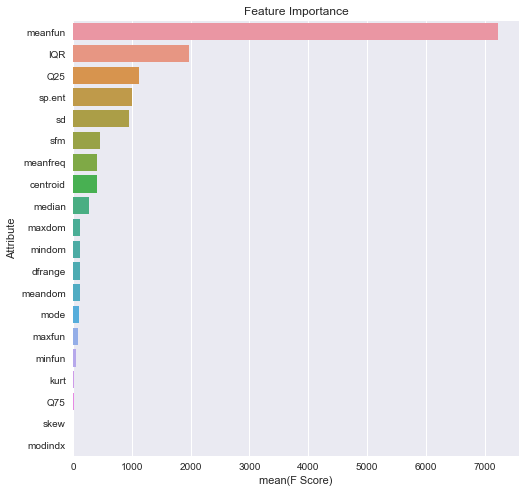

In [77]:
plt.figure(figsize=(8,8))
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')

In [99]:
x_importances=x[['meanfun','IQR','Q25','sp.ent','sd','sfm','meanfreq','centroid','median','maxdom','mindom','dfrange',
                 'meandom','mode','maxfun','minfun','kurt','Q75','skew']]

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_importances)
X = scaler.transform(x_importances)

x_transformed2=pd.DataFrame(X,columns=['X'+str(i) for i in range(1,20)])

In [102]:
modeling(x_transformed2,y)

Accuracy: 0.9527 (+/- 0.0325) [KNN]
Accuracy: 0.9663 (+/- 0.0204) [Logistic Regression]
Accuracy: 0.9659 (+/- 0.0202) [Stochastic Gradient Descent Classifier]
Accuracy: 0.9634 (+/- 0.0220) [Ridge Classifier]
Accuracy: 0.9656 (+/- 0.0216) [Logistic Regression CV]
Accuracy: 0.9631 (+/- 0.0268) [Adaptive Boosting]
Accuracy: 0.9656 (+/- 0.0188) [Bagging]
Accuracy: 0.9602 (+/- 0.0327) [Extremely Randomized Trees]
Accuracy: 0.9672 (+/- 0.0211) [Stochastic Gradient Boositng]
Accuracy: 0.9694 (+/- 0.0207) [Random Forest]
Accuracy: 0.9669 (+/- 0.0195) [Linear SVM]
Accuracy: 0.9666 (+/- 0.0220) [Kernel SVM]
Accuracy: 0.9050 (+/- 0.0627) [Extra Trees]
Accuracy: 0.9508 (+/- 0.0254) [Decision Trees]


C:\Users\Abdullah Ghifari\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Accuracy: 0.9625 (+/- 0.0279) [Neural Network]


In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_transformed2,y,random_state=123, test_size=0.3)

In [188]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=123,max_features=4,n_estimators=100)

In [189]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [190]:
RFC.score(x_test,y_test)

0.98002103049421663

## KEPUTUSAN MODEL TERBAIK ADALAH RANDOM FOREST

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
RFC=RandomForestClassifier(n_estimators=300,max_features='sqrt',random_state=123)
RFC.fit(x_train,y_train)
RFC.score(x_test,y_test)

0.98002103049421663

In [86]:
RFC.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [87]:
y_pred=RFC.predict(x_test)
y_true=np.array(y_test)

In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true,y_pred))

[[478  10]
 [  9 454]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=['0','1']))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       488
          1       0.98      0.98      0.98       463

avg / total       0.98      0.98      0.98       951



In [90]:
fi=list(RFC.feature_importances_)
index=[]
for i in range(0,20):
    index.append(i)
i=0
while i<20:
    j=0
    while j<20:
        if fi[j]<fi[i]:
            temp=fi[i]
            fi[i]=fi[j]
            fi[j]=temp
            temp=index[i]
            index[i]=index[j]
            index[j]=temp
        j=j+1
    i=i+1
print('Urutan Variabel Prioritas\n')
for i in range(0,20):
    print('%d. score : %0.4f, variabel ke-%d'%(i+1,fi[i],index[i]+1))

Urutan Variabel Prioritas

1. score : 0.3836, variabel ke-13
2. score : 0.1809, variabel ke-6
3. score : 0.1295, variabel ke-4
4. score : 0.0730, variabel ke-2
5. score : 0.0483, variabel ke-9
6. score : 0.0349, variabel ke-10
7. score : 0.0213, variabel ke-11
8. score : 0.0174, variabel ke-1
9. score : 0.0163, variabel ke-12
10. score : 0.0143, variabel ke-3
11. score : 0.0119, variabel ke-5
12. score : 0.0102, variabel ke-7
13. score : 0.0089, variabel ke-19
14. score : 0.0086, variabel ke-14
15. score : 0.0080, variabel ke-8
16. score : 0.0075, variabel ke-18
17. score : 0.0072, variabel ke-17
18. score : 0.0071, variabel ke-16
19. score : 0.0062, variabel ke-20
20. score : 0.0050, variabel ke-15


In [91]:
from sklearn.tree import export_graphviz

In [92]:
export_graphviz(RFC.estimators_[1],out_file='tree.dot',feature_names=x_train.columns)

In [93]:
import pydotplus 
dot_data = export_graphviz(RFC.estimators_[1], out_file=None, feature_names=x_train.columns) 

In [94]:
graph = pydotplus.graph_from_dot_data(dot_data) 

In [95]:
from IPython.display import Image

### HASIL MODEL TREE 1

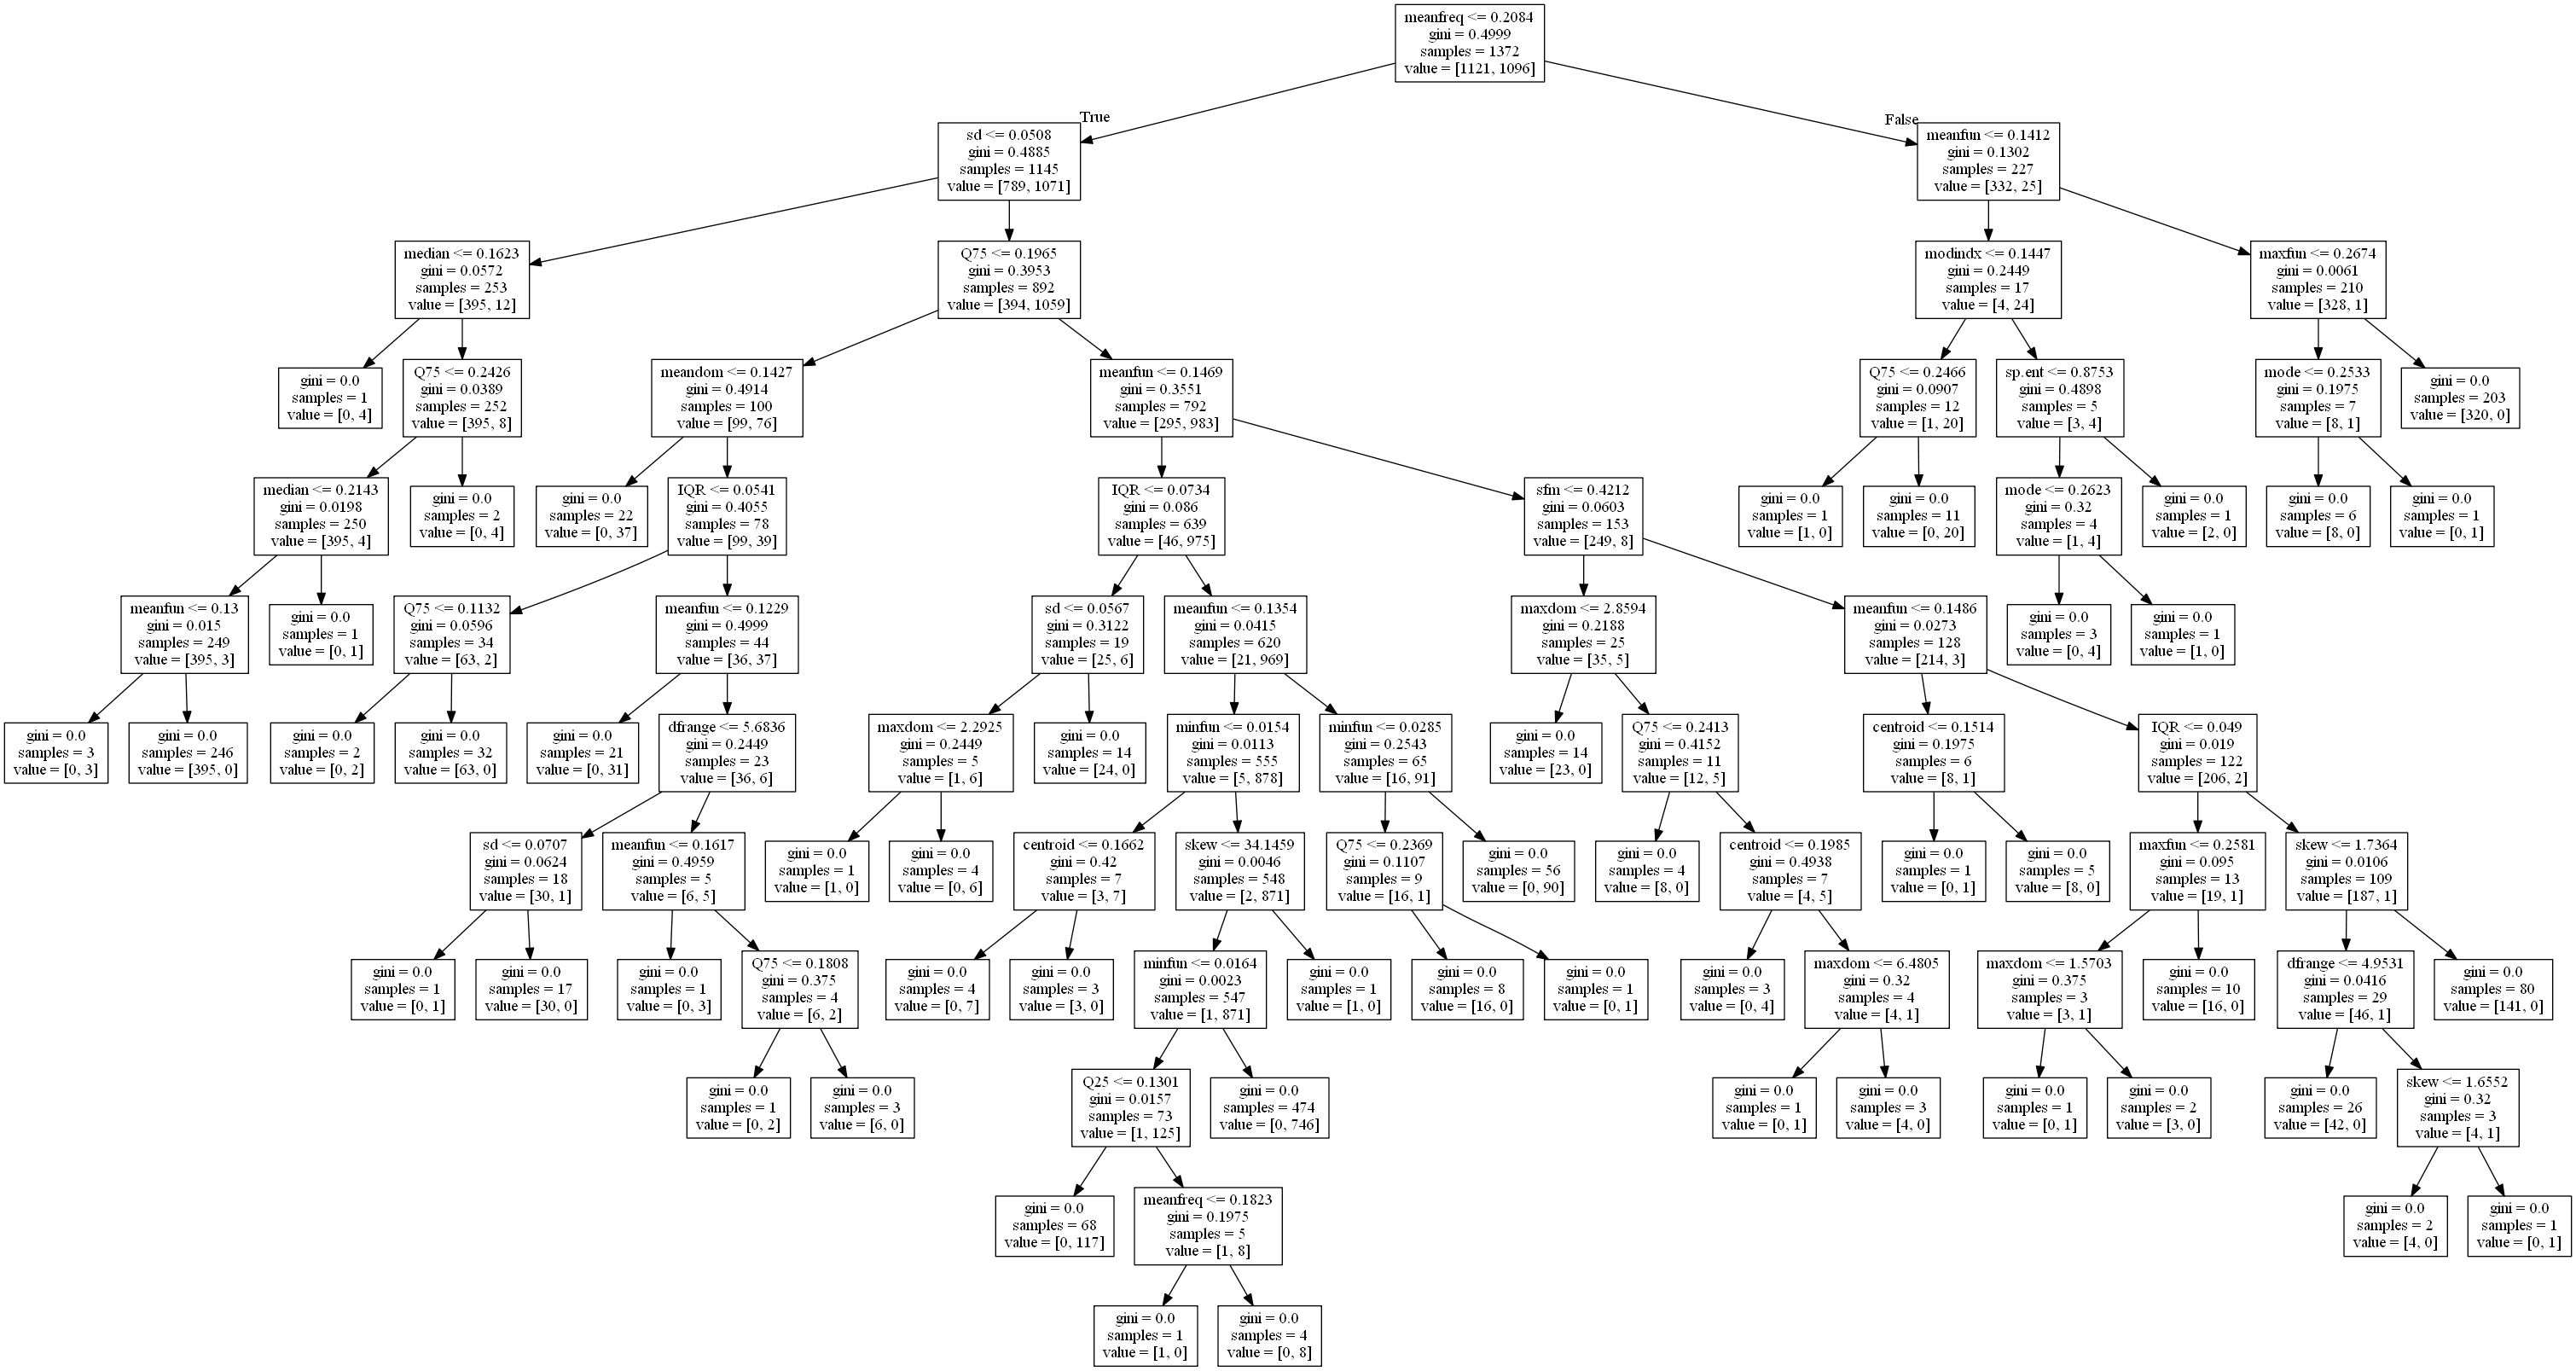

In [96]:
Image(graph.create_png())

In [191]:
graph.write_png('VR.png')

True

In [98]:
x.columns[[12,5,3,1,8,9,10,0,11,2,4,6,18,13,7,17,16,15,19,14]]

Index(['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'sfm', 'mode', 'meanfreq',
       'centroid', 'median', 'Q75', 'skew', 'dfrange', 'minfun', 'kurt',
       'maxdom', 'mindom', 'meandom', 'modindx', 'maxfun'],
      dtype='object')

In [192]:
import nltk

In [193]:
?nltk

In [211]:
?nltk.tokenize.sent_tokenize

In [202]:
par=['Hello World.']

In [203]:
par

['Hello World.']

In [207]:
para = "Hello World. It's good to see you. Thanks for buying this book."

In [212]:
from nltk.tokenize import sent_tokenize
sent_tokenize(para,language='english')

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - 'C:\\Users\\Abdullah Ghifari/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Abdullah Ghifari\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Abdullah Ghifari\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Abdullah Ghifari\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
